In [1]:
%matplotlib inline
#앞선 영화 리뷰, 주택 가격 예측에서 검정 세트가 일정 에포크 훈련후에는 성능 감소하는 것 확인
#오버피팅, 언더피팅 사이에서 균형을 잡아야한다 => 적절한 에포크 횟수는??
#오버피팅 막는 가장 좋은 방법 = 더 많은 훈련 데이터 사용
#그 다음 방법 = Regularization ;모델이 저장할 수 있는 정보의 양과 종류 제약을 걸어 특이한 패턴 학습 못하도록
#2가지 Regularization : 가중치 규제, Dropout

In [3]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-rc1


In [10]:
#IMDB 데이터셋 다운로드
#이전과 달리, 문장을 multi-hot encoding ; 빠르게 오버피팅하기 위해

NUM_WORDS = 1000
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words = NUM_WORDS)

def multi_hot_sequence(sequences, dimension):
    # 0으로 채워진 (len(sequences), dimension) 크기의 행렬을 만든다.
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
        #results[i]의 특정 인덱스만 1로 설정 = 원핫인코딩!!
    return results

train_data = multi_hot_sequence(train_data, dimension = NUM_WORDS)
test_data = multi_hot_sequence(test_data, dimension = NUM_WORDS)

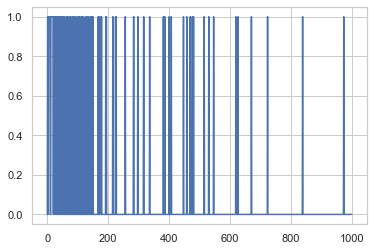

In [11]:
plt.plot(train_data[0])
#단어 인덱스는 빈도순으로 정렬 ; 인덱스 0에 가까울수록 1이 많이 등장

In [12]:
#오버피팅 예제
#오버피팅 막는 가장 간단한 방법 = 모델의 규모 축소
#모델의 규모 = 모델의 학습가능한 파라미터(모델 파라미터는 layer과 unit(node)에 의해 결정)
#모델의 파라미터 수 = 모델의 "기억용량"
#항상 기억하자!! ; 딥러닝 모델이 훈련세트에서 학습이 잘 되는 경향이 있지만 
#진짜 해결할 문제는 학습이 아니라 일반화!!
#알맞은 모델 크기 찾기 = 비교적 적은 수의 층과 파라미터에서 시작해 층 추가 도는 층 크기 늘리기
#until validation loss가 줄어들때까지

In [13]:
#기준 모델 만들기
baseline_model = keras.Sequential([
    #'.summary'메서드때문에 'input_shape'가 필요
    keras.layers.Dense(16, activation = 'relu', input_shape = (NUM_WORDS,)),
    keras.layers.Dense(16, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

baseline_model.compile(optimizer = 'adam',
                      loss = 'binary_crossentropy',
                      metrics = ['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                16016     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [14]:
baseline_history = baseline_model.fit(train_data,
                                     train_labels,
                                     epochs = 20,
                                     batch_size = 512,
                                     validation_data = (test_data, test_labels),
                                     verbose = 2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
25000/25000 - 1s - loss: 0.6046 - accuracy: 0.6763 - binary_crossentropy: 0.6046 - val_loss: 0.4545 - val_accuracy: 0.8078 - val_binary_crossentropy: 0.4545
Epoch 2/20
25000/25000 - 0s - loss: 0.3806 - accuracy: 0.8413 - binary_crossentropy: 0.3806 - val_loss: 0.3531 - val_accuracy: 0.8519 - val_binary_crossentropy: 0.3531
Epoch 3/20
25000/25000 - 0s - loss: 0.3260 - accuracy: 0.8654 - binary_crossentropy: 0.3260 - val_loss: 0.3329 - val_accuracy: 0.8588 - val_binary_crossentropy: 0.3329
Epoch 4/20
25000/25000 - 0s - loss: 0.3102 - accuracy: 0.8730 - binary_crossentropy: 0.3102 - val_loss: 0.3289 - val_accuracy: 0.8607 - val_binary_crossentropy: 0.3289
Epoch 5/20
25000/25000 - 0s - loss: 0.3026 - accuracy: 0.8756 - binary_crossentropy: 0.3026 - val_loss: 0.3279 - val_accuracy: 0.8602 - val_binary_crossentropy: 0.3279
Epoch 6/20
25000

In [15]:
#작은 모델 만들기 ; 앞서 만든 기준 모델과 비교하기 위해 적은 수의 hidden unit 모델 만듬
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation = 'relu', input_shape = (NUM_WORDS,)),
    keras.layers.Dense(4, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

smaller_model.compile(optimizer = 'adam',
                     loss = 'binary_crossentropy',
                     metrics = ['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 4004      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [16]:
smaller_history = smaller_model.fit(train_data,
                                   train_labels,
                                   epochs = 20,
                                   batch_size = 512,
                                   validation_data = (test_data, test_labels),
                                   verbose = 2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 1s - loss: 0.6145 - accuracy: 0.6669 - binary_crossentropy: 0.6145 - val_loss: 0.5034 - val_accuracy: 0.7802 - val_binary_crossentropy: 0.5034
Epoch 2/20
25000/25000 - 0s - loss: 0.4322 - accuracy: 0.8208 - binary_crossentropy: 0.4322 - val_loss: 0.3926 - val_accuracy: 0.8374 - val_binary_crossentropy: 0.3926
Epoch 3/20
25000/25000 - 0s - loss: 0.3602 - accuracy: 0.8534 - binary_crossentropy: 0.3602 - val_loss: 0.3537 - val_accuracy: 0.8524 - val_binary_crossentropy: 0.3537
Epoch 4/20
25000/25000 - 0s - loss: 0.3307 - accuracy: 0.8649 - binary_crossentropy: 0.3307 - val_loss: 0.3379 - val_accuracy: 0.8581 - val_binary_crossentropy: 0.3379
Epoch 5/20
25000/25000 - 0s - loss: 0.3166 - accuracy: 0.8702 - binary_crossentropy: 0.3166 - val_loss: 0.3311 - val_accuracy: 0.8596 - val_binary_crossentropy: 0.3311
Epoch 6/20
25000/25000 - 0s - loss: 0.3087 - accuracy: 0.8738 - binary_crossentropy: 0.3087 - val_loss: 0.3288

In [27]:
#큰 모델 만들기 ; 아주 큰 모델을 만들어 얼마나 빠르게 overfitting하는지 알아보자!
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation = 'relu', input_shape = (NUM_WORDS,)),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

bigger_model.compile(optimizer = 'adam',
                     loss = 'binary_crossentropy',
                     metrics = ['accuracy', 'binary_crossentropy'])

bigger_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               512512    
_________________________________________________________________
dense_19 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 513       
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [28]:
bigger_history = smaller_model.fit(train_data,
                                   train_labels,
                                   epochs = 20,
                                   batch_size = 512,
                                   validation_data = (test_data, test_labels),
                                   verbose = 2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 0s - loss: 0.2894 - accuracy: 0.8799 - binary_crossentropy: 0.2894 - val_loss: 0.3337 - val_accuracy: 0.8584 - val_binary_crossentropy: 0.3337
Epoch 2/20
25000/25000 - 0s - loss: 0.2887 - accuracy: 0.8801 - binary_crossentropy: 0.2887 - val_loss: 0.3320 - val_accuracy: 0.8594 - val_binary_crossentropy: 0.3320
Epoch 3/20
25000/25000 - 0s - loss: 0.2883 - accuracy: 0.8803 - binary_crossentropy: 0.2883 - val_loss: 0.3317 - val_accuracy: 0.8590 - val_binary_crossentropy: 0.3317
Epoch 4/20
25000/25000 - 0s - loss: 0.2885 - accuracy: 0.8802 - binary_crossentropy: 0.2885 - val_loss: 0.3344 - val_accuracy: 0.8572 - val_binary_crossentropy: 0.3344
Epoch 5/20
25000/25000 - 0s - loss: 0.2878 - accuracy: 0.8802 - binary_crossentropy: 0.2878 - val_loss: 0.3324 - val_accuracy: 0.8588 - val_binary_crossentropy: 0.3324
Epoch 6/20
25000/25000 - 0s - loss: 0.2872 - accuracy: 0.8800 - binary_crossentropy: 0.2872 - val_loss: 0.3380

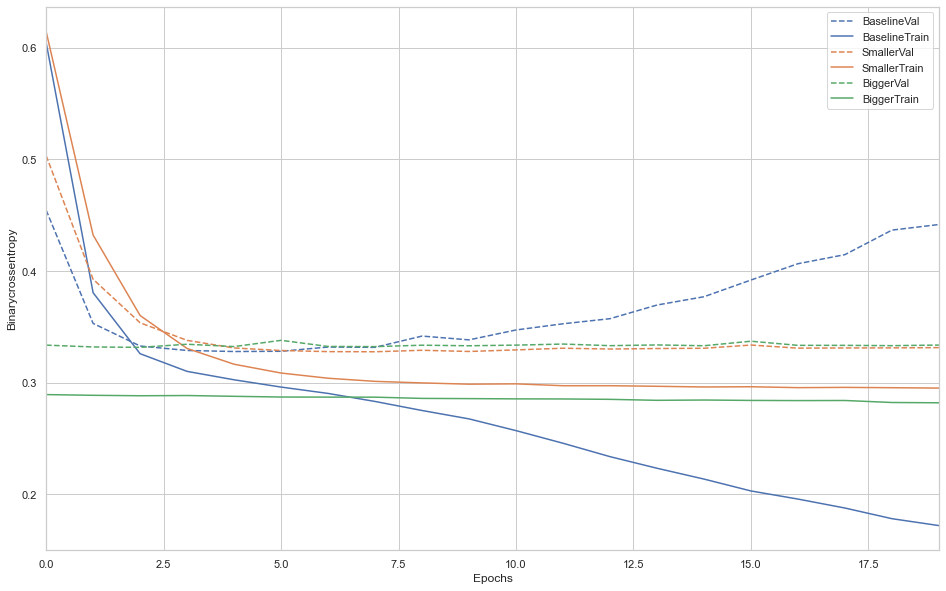

In [30]:
#test loss와 validation loss 그래프 그리기
def plot_history(histories, key = 'binary_crossentropy'):
    plt.figure(figsize = (16,10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                      '--',label = name.title()+'Val')
        plt.plot(history.epoch, history.history[key], color = val[0].get_color(),
                label = name.title() + 'Train')
    
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_','').title())
    plt.legend()
    
    plt.xlim([0,max(history.epoch)])
    
plot_history([('baseline', baseline_history),
             ('smaller', smaller_history),
             ('bigger', bigger_history)])

#실선 = test loss, 점선 = val. loss
#작은 네트워크가 baseline보다 늦게 overfitting & 천천히 성능감소
#큰 네트워크가 1번째 에포크 이후 overfitting 시작 & 급하게 성능감소(내꺼는 좀 이상)

In [32]:
#Overfitting 방지 전략 1 : 가중치 규제하기(weight regularization)
#간단한(작은 엔트로피) 모델은 복잡한 모델보다 overfitting 경향이 적다!!
#How to? 가중치weight가 작은 값을 가지도록 네크워크의 복잡도에 제약을 가함
#How to specifically? 네트워크 loss function에 큰 가중치에 해당하는 비용 추가
#비용 1번째 : L1 norm : weight의 절댓값에 비례하는 비용 추가
#비용 2번째 : L2 norm ; weight의 제곱에 비례하는 비용 추가(also known weight dacay)
#Tipically, L1 norm은 일부 weight param. 0으로 만듬, L2 norm은 weight param. 완전히 0 만들지 않음
#That is why L2 norm is widely used!

#L2 norm 추가해보자

l2_model = keras.models.Sequential([
    keras.layers.Dense(16,kernel_regularizer = keras.regularizers.l2(0.001),
    #l2(0.001) =네트워크 전체 손실에 층에 있는 가중치 행렬의 모든 값이
    #0.001 * weight_coefficient_value**2만큼 더해진다.
    #이런 penalty는 훈련할때만 추가되어 테스트 단계보다 훈련단계에서 loss 더 큼.
                      activation = 'relu', input_shape = (NUM_WORDS,)),
    keras.layers.Dense(16,kernel_regularizer = keras.regularizers.l2(0.001),
                      activation = 'relu'),
    keras.layers.Dense(1,activation = 'sigmoid')
])

l2_model.compile(optimizer = 'adam',
                loss = 'binary_crossentropy',
                metrics = ['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data,train_labels,
                               epochs = 20,
                               batch_size = 512,
                               validation_data = (test_data, test_labels),
                               verbose = 2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 1s - loss: 0.6581 - accuracy: 0.6756 - binary_crossentropy: 0.6140 - val_loss: 0.5234 - val_accuracy: 0.8034 - val_binary_crossentropy: 0.4822
Epoch 2/20
25000/25000 - 0s - loss: 0.4339 - accuracy: 0.8406 - binary_crossentropy: 0.3935 - val_loss: 0.3974 - val_accuracy: 0.8476 - val_binary_crossentropy: 0.3577
Epoch 3/20
25000/25000 - 0s - loss: 0.3668 - accuracy: 0.8658 - binary_crossentropy: 0.3280 - val_loss: 0.3696 - val_accuracy: 0.8603 - val_binary_crossentropy: 0.3319
Epoch 4/20
25000/25000 - 0s - loss: 0.3506 - accuracy: 0.8705 - binary_crossentropy: 0.3137 - val_loss: 0.3637 - val_accuracy: 0.8616 - val_binary_crossentropy: 0.3279
Epoch 5/20
25000/25000 - 0s - loss: 0.3413 - accuracy: 0.8733 - binary_crossentropy: 0.3063 - val_loss: 0.3615 - val_accuracy: 0.8607 - val_binary_crossentropy: 0.3273
Epoch 6/20
25000/25000 - 0s - loss: 0.3374 - accuracy: 0.8754 - binary_crossentropy: 0.3039 - val_loss: 0.3600

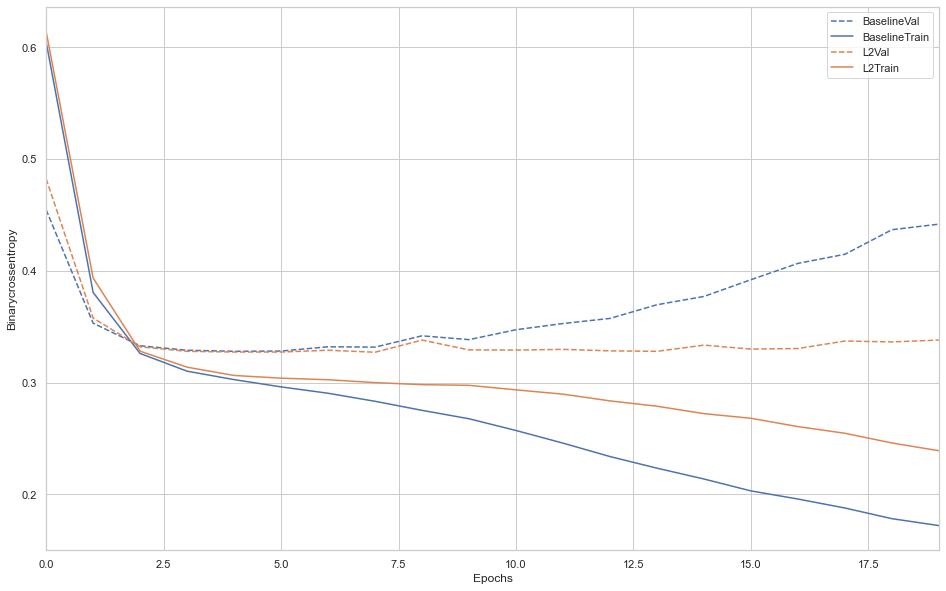

In [35]:
plot_history([('baseline', baseline_history),
             ('l2',l2_model_history)])
#그림에서 보듯이 l2 norm적용 모델이 overfitting 훨씬 잘 견디고 있다..!

In [36]:
#Overfitting 방지 전략 2 : Drop out(신경망에서 가장 효과적이고 널리 사용하는 규제 기법)
#Dropout이란? 층의 출력 특성을 랜덤하게 0으로 끈다.
#예; 출력벡터[0.2, 0.5, 1.3, 0.8, 1.1] -> [0, 0.5, 1.3, 0, 1.1]
#Test ; Drop out사용안함 대신 층의 출력 값을 drop out 비율만큼 줄인다.(이유는 훈련단계보다 더 많은 유닛;노드가 활성화되기 때문)


dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation = 'relu', input_shape = (NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    #이 층은 바로 이전 층의 출력에 드롭아웃을 적용 즉, 0.5이면
    #이전 출력층의 0.5비율만큼 0으로 만듬
    keras.layers.Dense(16, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation = 'sigmoid')
])

dpt_model.compile(optimizer = 'adam',
                 loss = 'binary_crossentropy',
                 metrics = ['accuracy', 'binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                 epochs = 20,
                                 batch_size = 512,
                                 validation_data = (test_data, test_labels),
                                 verbose = 2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 1s - loss: 0.6726 - accuracy: 0.5729 - binary_crossentropy: 0.6726 - val_loss: 0.5924 - val_accuracy: 0.7633 - val_binary_crossentropy: 0.5924
Epoch 2/20
25000/25000 - 0s - loss: 0.5763 - accuracy: 0.7016 - binary_crossentropy: 0.5763 - val_loss: 0.4684 - val_accuracy: 0.8270 - val_binary_crossentropy: 0.4684
Epoch 3/20
25000/25000 - 0s - loss: 0.4916 - accuracy: 0.7784 - binary_crossentropy: 0.4916 - val_loss: 0.3881 - val_accuracy: 0.8477 - val_binary_crossentropy: 0.3881
Epoch 4/20
25000/25000 - 0s - loss: 0.4406 - accuracy: 0.8109 - binary_crossentropy: 0.4406 - val_loss: 0.3511 - val_accuracy: 0.8542 - val_binary_crossentropy: 0.3511
Epoch 5/20
25000/25000 - 0s - loss: 0.4024 - accuracy: 0.8335 - binary_crossentropy: 0.4024 - val_loss: 0.3358 - val_accuracy: 0.8581 - val_binary_crossentropy: 0.3358
Epoch 6/20
25000/25000 - 0s - loss: 0.3869 - accuracy: 0.8414 - binary_crossentropy: 0.3869 - val_loss: 0.3281

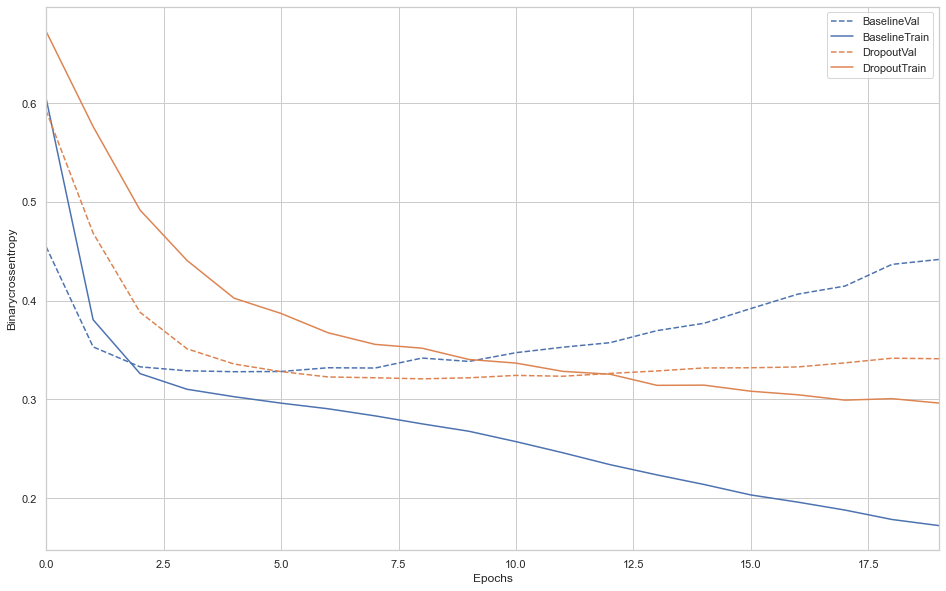

In [37]:
plot_history([('baseline',baseline_history),
             ('dropout',dpt_model_history)])
#드랍아웃을 추가하니 기존모델보다 확실히 향상되었다.

In [38]:
####정리###
#신경망에서 overfitting 방지 방법
#1번 : 더 많은 훈련 데이터 모으기
#2번 : 네트워크의 용량 줄이기(작은 모델만들기;적은 layer, node)
#3번 : 가중치 규제 추가(L1 norm, L2 norm)
#4번 : Drop out
#5번 : Data-Augmentation
#6번 : Batch normalization